In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error , mean_squared_error
from math import sqrt
# This is for regression
from sklearn.ensemble import RandomForestRegressor
# This is for classification
from sklearn.metrics import plot_confusion_matrix
from sklearn import tree

In [81]:
df = pd.read_csv("pollution_us_2000_2016.csv").dropna()
df.head()


In [83]:
df.shape

(436876, 29)

In [85]:
df.isnull().sum().sum()

0

In [88]:
#Basline of Target Label 
df["CO AQI"].mean()

5.996257519296093

In [89]:
# Delete Columns That cause Data Leakage 
del df["Unnamed: 0"]
del df["CO 1st Max Value"]
del df["CO Mean"]

In [113]:
# Know the Data Types of each Columns
df.dtypes

State Code             int64
County Code            int64
Site Num               int64
Address               object
State                 object
County                object
City                  object
Date Local            object
NO2 Units             object
NO2 Mean             float64
NO2 1st Max Value    float64
NO2 1st Max Hour       int64
NO2 AQI                int64
O3 Units              object
O3 Mean              float64
O3 1st Max Value     float64
O3 1st Max Hour        int64
O3 AQI                 int64
SO2 Units             object
SO2 Mean             float64
SO2 1st Max Value    float64
SO2 1st Max Hour       int64
SO2 AQI              float64
CO Units              object
CO 1st Max Hour        int64
CO AQI               float64
dtype: object

In [92]:
# Split Data
train, test = train_test_split(
    df, 
    train_size = .80,
    test_size =.20,
    random_state=42
)

train, val = train_test_split(
    train,
    train_size = .80,
    test_size = .20,
    random_state=42
)

In [93]:
# function that return only numaric Columns in order to use in train , validation , test sets
def cleaner(df):
    "Return Only Numeric Features"
    
    # Create boolean array with only columns that are float64
    columns_bool = (df.dtypes != "object").values

    # Return only numeric columns
    df = df.iloc[:, columns_bool].dropna()

    return df

train_numeric = cleaner(train)
val_numeric = cleaner(val)
test_numeric = cleaner(test)



In [94]:
# plot that show the correlation between each column
corr = train_numeric.corr()
corr.style.background_gradient(cmap='coolwarm')

,State Code,County Code,Site Num,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO 1st Max Hour,CO AQI
State Code,1.000000,0.269006,-0.243775,-0.096302,-0.070334,0.016660,-0.071206,0.045350,0.037833,0.003446,0.034605,0.174313,0.176840,0.114684,0.184430,-0.029983,-0.190086
County Code,0.269006,1.000000,-0.144144,-0.093047,-0.071535,-0.003031,-0.072940,0.057236,0.050885,-0.006769,0.042880,-0.008714,0.038229,0.014405,0.037501,-0.010067,-0.089805
Site Num,-0.243775,-0.144144,1.000000,0.071084,0.072555,-0.013817,0.073571,0.041835,0.088570,0.000482,0.082396,-0.078846,-0.073213,-0.067965,-0.074597,-0.003891,0.066404
NO2 Mean,-0.096302,-0.093047,0.071084,1.000000,0.904572,0.113403,0.905378,-0.433838,-0.154275,0.026725,-0.084096,0.347501,0.276676,0.115592,0.295885,0.244808,0.662367
NO2 1st Max Value,-0.070334,-0.071535,0.072555,0.904572,1.000000,0.148836,0.997848,-0.292937,0.007573,0.022220,0.046758,0.300338,0.260289,0.132125,0.278152,0.287053,0.612183
NO2 1st Max Hour,0.016660,-0.003031,-0.013817,0.113403,0.148836,1.000000,0.148100,-0.204111,-0.091697,-0.127167,-0.088052,0.026337,0.020636,0.170745,0.021122,0.300465,0.057876
NO2 AQI,-0.071206,-0.072940,0.073571,0.905378,0.997848,0.148100,1.000000,-0.292853,0.008006,0.022085,0.047011,0.303912,0.263332,0.130715,0.281627,0.287290,0.615020
O3 Mean,0.045350,0.057236,0.041835,-0.433838,-0.292937,-0.204111,-0.292853,1.000000,0.860867,0.046045,0.768868,-0.110899,-0.066770,-0.083180,-0.071137,-0.215965,-0.356394
O3 1st Max Value,0.037833,0.050885,0.088570,-0.154275,0.007573,-0.091697,0.008006,0.860867,1.000000,0.055778,0.931839,-0.017049,0.032813,-0.015662,0.034542,-0.101944,-0.181090
O3 1st Max Hour,0.003446,-0.006769,0.000482,0.026725,0.022220,-0.127167,0.022085,0.046045,0.055778,1.000000,0.048818,0.027085,0.028344,-0.021044,0.030308,-0.087006,0.008129


In [95]:
X_train = train_numeric.iloc[:, 1:-1]
y_train = train_numeric.iloc[:, -1]

X_val = val_numeric.iloc[:, 1:-1]
y_val = val_numeric.iloc[:, -1]

X_test = test_numeric.iloc[:, 1:-1]
y_test = test_numeric.iloc[:, -1]

## Random Forest model

In [96]:

reg_forest = RandomForestRegressor(
    n_estimators = 10, # How many trees in our forest
    random_state = 0, # So we can reproduce our work
    criterion = 'mse') # how to judge the quality of each split

reg_forest.fit(X_train, y_train)




## Train Data

In [114]:
preds_train = reg_forest.predict(X_train)
print ("mean_absolute_error:",mean_absolute_error(y_true=y_train, y_pred=preds_train))
print ("mean_squared_error:",mean_squared_error (y_true=y_train, y_pred=preds_train))
print ("sqrt:",sqrt(mean_squared_error(y_train,preds_train)))


mean_absolute_error: 0.8258197727195312
mean_squared_error: 2.051044303913656
sqrt: 1.43214674664074


## Test Data

In [116]:
preds_forest = reg_forest.predict(X_test)
print ("mean_absolute_error:",mean_absolute_error(y_true=y_test, y_pred=preds_forest))
print ("mean_squared_error:",mean_squared_error (y_true=y_test, y_pred=preds_forest))
print ("sqrt:",sqrt(mean_squared_error(y_test,preds_forest)))


mean_absolute_error: 2.0459089157278307
mean_squared_error: 10.969171322031196
sqrt: 3.3119739313634695


## baseline model

In [117]:
y_train.mean()
preds = [6.000304005722461 for x in range(len(y_train))]
print ("mean_absolute_error:",mean_absolute_error(y_true=y_train, y_pred=preds))
print ("mean_squared_error:",mean_squared_error (y_true=y_train, y_pred=preds))
print ("sqrt:",sqrt(mean_squared_error(y_train,preds)))



mean_absolute_error: 3.782913892931042
mean_squared_error: 34.469281023460354
sqrt: 5.871054506939989


### The result of cost function of the model with train data set has less mean_absolute_error and mean_squared_error than both the baseline & the test data set. 
### I reduced three features in order to deal with data Leakage 


In [108]:
reg_forest.feature_importances_

array([0.07779407, 0.08609372, 0.47467259, 0.03599318, 0.03084289,
       0.02779911, 0.05564572, 0.02004378, 0.02253683, 0.01963235,
       0.04631528, 0.02195611, 0.02829565, 0.01466471, 0.03771399])

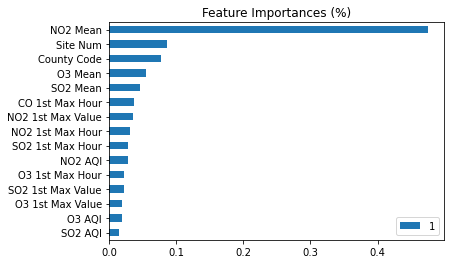

In [110]:
# see the importance of each columns in the model 
pd.DataFrame(dict(zip(X_test.columns, reg_forest.feature_importances_)), index = [1])\
.T\
.sort_values(1, ascending=True)\
.plot(kind="barh", title="Feature Importances (%)");